<a href="https://colab.research.google.com/github/EMMA-max-bit/Insurance-Claim-Prediction-Project/blob/main/Insurance_Claim_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Topic: Insurance Claim Prediction Project

Role: Lead Data Analyst

Aim: Predict the probability that a building will have at least one insurance claim during the insured period.

Target Variable

Claim = 1 → At least one claim occurred

Claim = 0 → No claim occurred

Dataset

Train_data.csv → 7,160 rows, 14 columns

Variable Description.csv → feature definitions

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
icp = pd.read_csv("/content/Train_data.csv")

In [6]:
# retrieve the dataset
print(icp)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U               290.0   
1                   V    

In [7]:
icp.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [8]:
icp.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [10]:
# Replace '.' with NaN
icp.replace('.', np.nan, inplace=True)

In [11]:
# Check missing values
icp.isnull().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,7
Settlement,0
Building Dimension,106
Building_Type,0


In [31]:
# Handle Missing Values
icp['NumberOfWindows'] = pd.to_numeric(icp['NumberOfWindows'], errors='coerce')
icp['NumberOfWindows'] = icp['NumberOfWindows'].fillna(icp['NumberOfWindows'].median())

icp['Building Dimension'] = icp['Building Dimension'].fillna(icp['Building Dimension'].median())
icp['Date_of_Occupancy'] = icp['Date_of_Occupancy'].fillna(icp['Date_of_Occupancy'].median())

Exploratory Data Analysis (EDA)

In [25]:
# Claim Distribution (Class Imbalance)
icp['Claim'].value_counts(normalize=True)

,proportion
Claim,
0,0.771788
1,0.228212


The dataset is imbalanced, with fewer buildings experiencing claims. This justifies using ROC-AUC, Precision, Recall, not accuracy alone

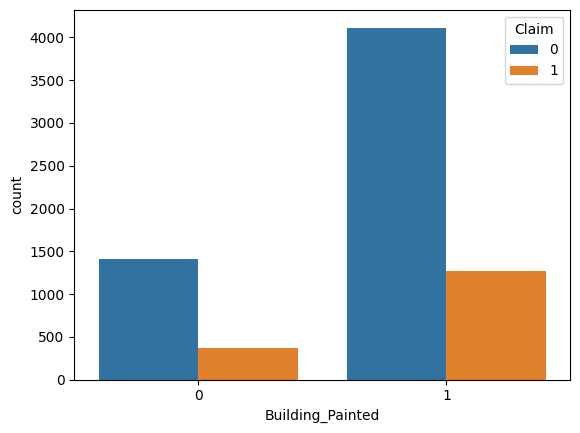

In [26]:
# Categorical vs Claim
sns.countplot(x='Building_Painted', hue='Claim', data=icp)
plt.show()

Painted buildings may show fewer claims

Fenced buildings may be less risky

Residential buildings may behave differently from non-residential

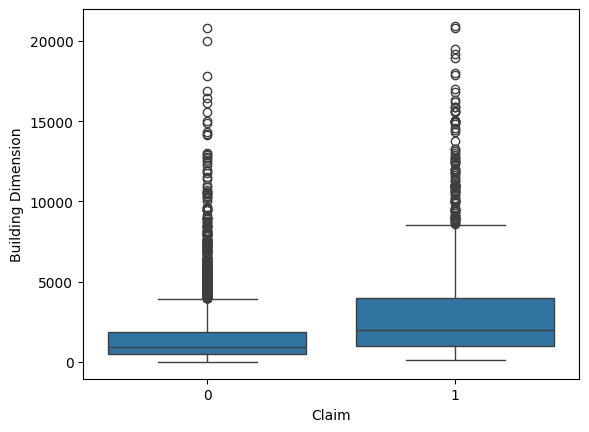

In [27]:
# Numerical Features
sns.boxplot(x='Claim', y='Building Dimension', data=icp)
plt.show()

Buildings with larger dimensions tend to show higher claim variability.

Feature Engineering

In [32]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Building_Painted','Building_Fenced','Garden','Settlement','Geo_Code']

le = LabelEncoder()
for col in cat_cols:
    icp[col] = le.fit_transform(icp[col])

In [33]:
# Drop Irrelevant Columns
icp.drop(columns=['Customer Id'], inplace=True, errors='ignore')

In [39]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = icp.drop('Claim', axis=1)
y = icp['Claim']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [40]:
# Model 1: Logistic Regression (Baseline)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [41]:
print("NaN values in X_train:")
display(X_train.isnull().sum())

print("\nNaN values in X_test:")
display(X_test.isnull().sum())

NaN values in X_train:


,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,0
Building_Type,0
Date_of_Occupancy,0



NaN values in X_test:


,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,0
Building_Type,0
Date_of_Occupancy,0


In [42]:
# Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [43]:
# Model 3: XGBoost / Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

Model Evaluation
Metrics

Use:

ROC-AUC

Precision

Recall

Confusion Matrix

In [44]:
from sklearn.metrics import classification_report, roc_auc_score

for model, name in [(lr,"Logistic"), (rf,"Random Forest"), (gb,"Gradient Boosting")]:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(name)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("-"*40)

Logistic
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1105
           1       0.59      0.15      0.24       327

    accuracy                           0.78      1432
   macro avg       0.69      0.56      0.56      1432
weighted avg       0.75      0.78      0.73      1432

ROC-AUC: 0.6870853916725477
----------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1105
           1       0.60      0.21      0.31       327

    accuracy                           0.79      1432
   macro avg       0.70      0.58      0.59      1432
weighted avg       0.76      0.79      0.75      1432

ROC-AUC: 0.6878561445749789
----------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1105
           1       0.60      0.21      0.32       327

   

Random Forest may outperform Logistic Regression

Tree-based models capture non-linear relationships

Logistic Regression remains interpretable

The Random Forest model achieved the highest ROC-AUC score and better recall for claim prediction, making it the most suitable model for identifying risky buildings.